In [1]:
from houseprices.config import data_dir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(data_dir / 'train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploring datastructure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

#### Exploring the relation between 'MSZoning' and 'SalePrice'

In [4]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

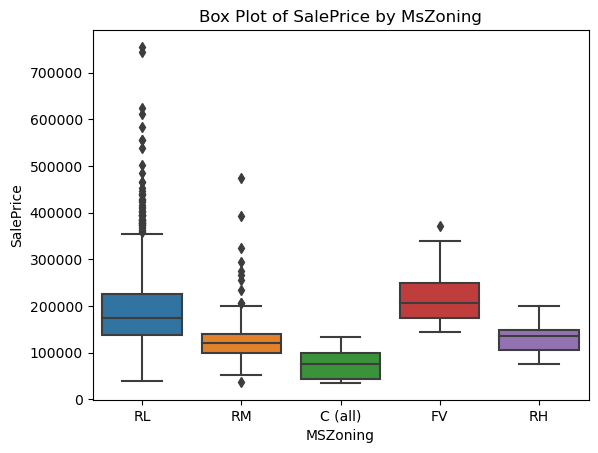

In [5]:
sns.boxplot(data=df.loc[:, ['MSZoning','SalePrice']], x='MSZoning', y='SalePrice')
plt.title('Box Plot of SalePrice by MsZoning')
plt.show()

In [6]:
df.groupby('MSZoning')['SalePrice'].agg(['mean', q1,'median', q3])

,mean,q1,median,q3
MSZoning,,,,
C (all),74528.000000,43998.25,74700.0,98332.0
FV,214014.061538,174000.00,205950.0,250000.0
RH,131558.375000,106150.00,136500.0,148608.5
RL,191004.994787,137700.00,174000.0,224700.0
RM,126316.830275,100000.00,120500.0,140000.0


> Despite outliers, houses in 'Floating Village Residential' are the most expensive ones.

#### Exploring the relation between 'LotArea' and 'SalePrice'

Text(0.5, 1.0, 'Scatterplot between LotArea and SalePrice')

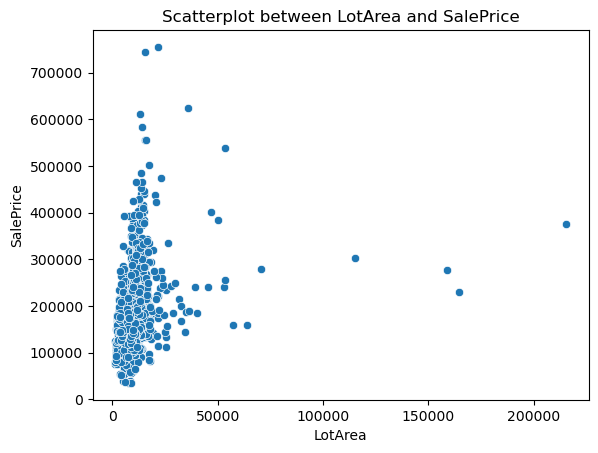

In [7]:
sns.scatterplot(data=df.loc[:,['LotArea','SalePrice']], x= 'LotArea', y='SalePrice')
plt.title('Scatterplot between LotArea and SalePrice')

Firsty, we will remove 'LotArea' outliers

In [8]:
df1 = df.loc[:,['LotArea','SalePrice', 'MSZoning']].copy()
z = np.abs(stats.zscore(df1['LotArea']))
df1 = df1[z < 3]

Text(0.5, 1.0, 'Scatterplot between LotArea and SalePrice')

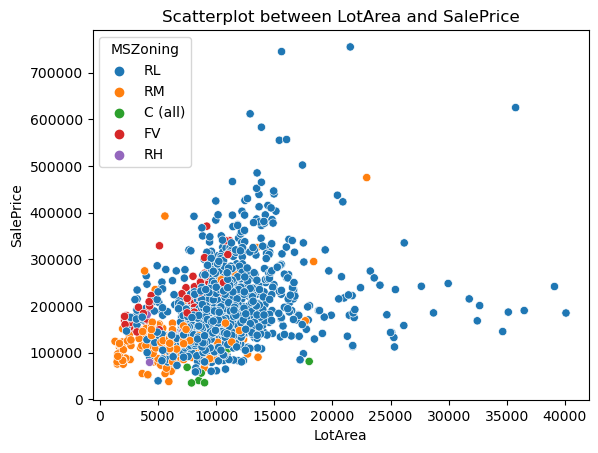

In [9]:
sns.scatterplot(data=df1, x= 'LotArea', y='SalePrice', hue='MSZoning')
plt.title('Scatterplot between LotArea and SalePrice')

In [10]:
df1.loc[:,['LotArea','SalePrice']] .corr()

,LotArea,SalePrice
LotArea,1.000000,0.376477
SalePrice,0.376477,1.000000


> According to the plot and Pearson correlation. There is not a strong correlation between 'LotArea' and 'SalePrice'

c:\Users\pvera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


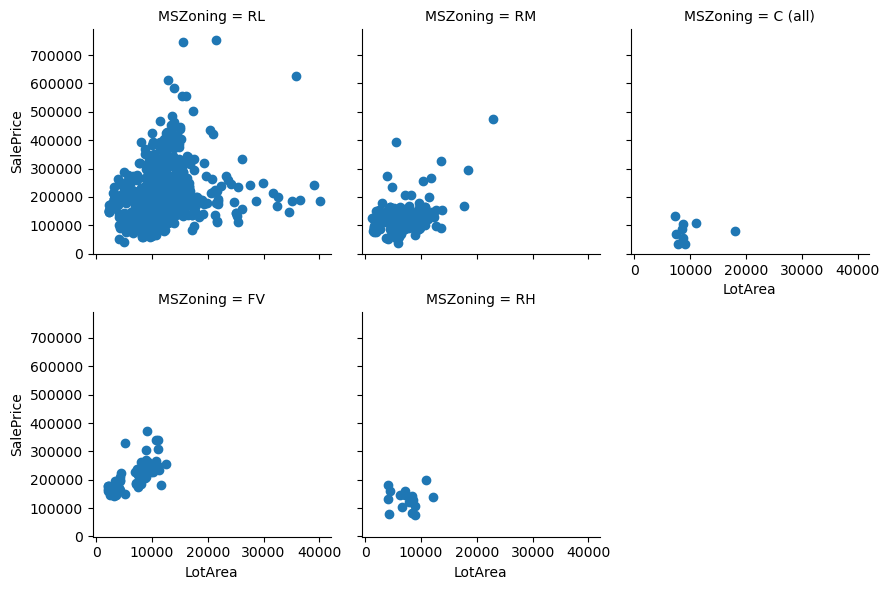

In [11]:
g = sns.FacetGrid(data= df1, col='MSZoning', col_wrap=3)
g.map(plt.scatter,'LotArea','SalePrice')
plt.show()

In [12]:
print('MSZoning==RL')
print(df1[df1['MSZoning']=='RL'].iloc[:,0:2].corr())
print('\nMSZoning==RM')
print(df1[df1['MSZoning']=='RM'].iloc[:,0:2].corr())
print('\nMSZoning==C')
print(df1[df1['MSZoning']=='C (all)'].iloc[:,0:2].corr())
print('\nMSZoning==FV')
print(df1[df1['MSZoning']=='FV'].iloc[:,0:2].corr())
print('\nMSZoning==RH')
print(df1[df1['MSZoning']=='RH'].iloc[:,0:2].corr())

MSZoning==RL
            LotArea  SalePrice
LotArea    1.000000   0.312308
SalePrice  0.312308   1.000000

MSZoning==RM
            LotArea  SalePrice
LotArea    1.000000   0.419281
SalePrice  0.419281   1.000000

MSZoning==C
            LotArea  SalePrice
LotArea    1.000000   0.085421
SalePrice  0.085421   1.000000

MSZoning==FV
            LotArea  SalePrice
LotArea    1.000000   0.700305
SalePrice  0.700305   1.000000

MSZoning==RH
            LotArea  SalePrice
LotArea    1.000000   0.013779
SalePrice  0.013779   1.000000


> The only linear correlation between LotArea and SalePrice was found within 'FV' houses (CORR = 0.70). It's positive and strong.

#### Exploring the relation between 'Year' and 'SalePrice'

In [13]:
df2 = df.loc[:,['YrSold','SalePrice', 'MSZoning']].copy()

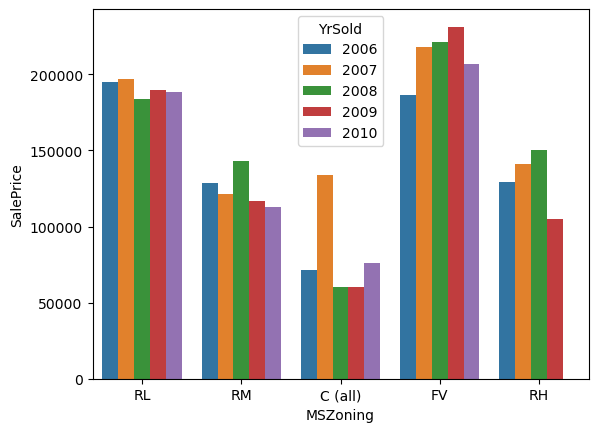

In [14]:
sns.barplot(data = df2, x='MSZoning', y= 'SalePrice', hue='YrSold', errorbar=None)
plt.show()

> According to the plot, prices have been rising between 2006 and 2010 for 'FV' houses, but apart from that we cant establish any relation between 'YrSold' and 'SalePrice'.